In [150]:
import sys
import os 
import openmc
import numpy as np
import matplotlib.pyplot as plt
import openmc.mgxs as mgxs
from IPython.display import Image
import glob
import pandas as pd
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt

### Choose problem number

In [151]:
pb_num_list=['2A']

### Import output

In [152]:
def import_output(pb_num):
    sp_file='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/power/sp_'+pb_num+'.h5'
    sm_file='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/power/sm_'+pb_num+'.h5'
    sm=openmc.Summary(sm_file)
    sp = openmc.StatePoint(sp_file)
    sp.link_with_summary(sm)
    model=openmc.model.Model
    model_file='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/power/model_'+pb_num+'.xml'
    model=openmc.model.Model.from_model_xml(model_file)
    return(model,sp,sm)

In [153]:
import_dict={}
for pb_num in pb_num_list:
        import_dict[pb_num]=[import_output(pb_num)[0],import_output(pb_num)[1],import_output(pb_num)[2]]

/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=13.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=14.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=15.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=16.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=76.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=77.
  warn(msg, IDWarning)


### Print k_eff values

In [154]:
keff_dict = {}
keff_dict['2A'] = 1.182175 
keff_dict['2B'] = 1.183360
keff_dict['2C'] = 1.173751
keff_dict['2D'] = 1.165591
keff_dict['2E'] = 1.069627
keff_dict['2F'] = 0.976018
keff_dict['2G'] = 0.847695
keff_dict['2H'] = 0.788221
keff_dict['2I'] = 1.179916 
keff_dict['2J'] = 0.975193
keff_dict['2K'] = 1.020063
keff_dict['2L'] = 1.018915
keff_dict['2M'] = 0.938796
keff_dict['2N'] = 0.869615
keff_dict['2O'] = 1.047729
keff_dict['2P'] = 0.927410
def print_keff(pb_num):
    vera_value=keff_dict[pb_num]
    my_value=import_dict[pb_num][1].k_combined.nominal_value
    my_uncer=import_dict[pb_num][1].k_combined.std_dev*1e5
    return(my_value,my_uncer,vera_value,1e5*(my_value-vera_value))




In [155]:
for pb_num in pb_num_list:
    print(pb_num,print_keff(pb_num)[0],print_keff(pb_num)[1],print_keff(pb_num)[2],print_keff(pb_num)[3])

2A 1.1810729955839792 106.27152479796943 1.182175 -110.20044160208187


/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/statepoint.py:277: FutureWarning: The 'k_combined' property has been renamed to 'keff' and will be removed in a future version of OpenMC.
  warnings.warn(


### Get Power and Flux values

In [159]:
for index, tally in enumerate(import_output('2A')[1].tallies):
    if index==0:
        t_fission=import_output('2A')[1].tallies[tally]
    if index==1:
        t_nufission=import_output('2A')[1].tallies[tally]
    if index==2:
        t_kappafission=import_output('2A')[1].tallies[tally]        
print(t_fission)

Tally
	ID             =	2972
	Name           =	power
	Filters        =	MeshFilter
	Nuclides       =	total
	Scores         =	['fission', 'nu-fission', 'kappa-fission']
	Estimator      =	tracklength
	Multiply dens. =	True


/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=13.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=14.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=15.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=16.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=76.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=77.
  warn(msg, IDWarning)


In [157]:

tally=import_output('2A')[1].tallies

for index, tally in enumerate(import_output('2A')[1].tallies):
    if index==0:
        t_power=import_output('2A')[1].tallies[tally]
tally_data_reshaped =t_power.get_reshaped_data()
print(tally_data_reshaped)

tally_kappa = np.array(tally_data_reshaped)[:, 0, 2]
print(tally_kappa)
len(tally_kappa)


[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+0

/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=13.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=14.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=15.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=16.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=76.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=77.
  warn(msg, IDWarning)


289

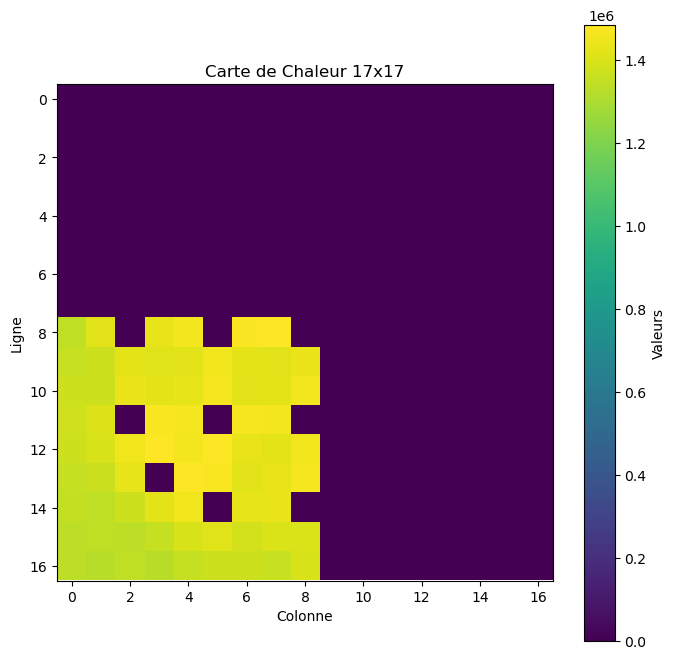

In [139]:

values = tally_kappa
# Convertir la liste en un tableau 17x17
data = np.array(values).reshape((17, 17))

# Multiplier par 2 les éléments de la 9e ligne et 9e colonne
data[8, :] *= 2  # Multiplier toute la 9e ligne (index 8) par 2
data[:, 8] *= 2  # Multiplier toute la 9e colonne (index 8) par 2

# Créer la carte de chaleur
plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Ajouter une barre de couleur
plt.colorbar(label='Valeurs')

# Ajouter des labels et un titre
plt.title('Carte de Chaleur 17x17')
plt.xlabel('Colonne')
plt.ylabel('Ligne')

# Afficher le tableau
plt.show()

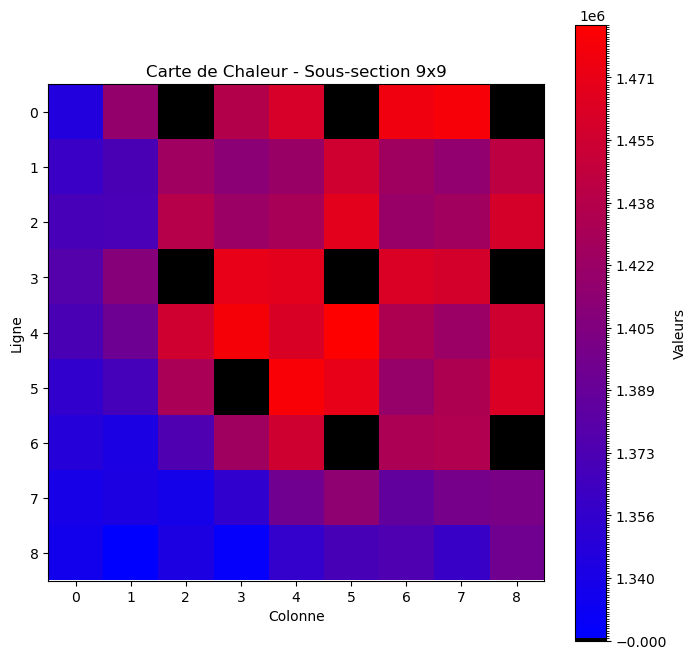

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Supposons que `values` est votre liste de 289 valeurs
values = tally_kappa  # Remplacez ceci par vos propres valeurs

# Convertir la liste en un tableau 17x17
data = np.array(values).reshape((17, 17))

# Multiplier par 2 les éléments de la 9e ligne et 9e colonne
# Multiplier par 2 les éléments de la 9e ligne et 9e colonne
# Multiplier par 2 les éléments de la 9e ligne et 9e colonne
data[8, :] *= 2  # Multiplier toute la 9e ligne (index 8) par 2
data[:, 8] *= 2  # Multiplier toute la 9e colonne (index 8) par 2

# Sélectionner la sous-section désirée : colonnes de 0 à 8 et lignes de 8 à 16
subset = data[8:17, 0:9]

# Créer une colormap personnalisée allant du bleu au rouge
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'red'], N=256)

# Créer un normaliseur qui exclut les valeurs nulles
bounds = np.linspace(np.min(subset[subset > 0]), np.max(subset), 256)
norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=256)

# Créer une colormap pour afficher les zéros en noir
cmap_with_black = mcolors.ListedColormap(['black'] + [cmap(i) for i in range(cmap.N - 1)])
bounds_with_black = [-1] + list(bounds)  # Inclure un -1 pour les valeurs nulles
norm_with_black = mcolors.BoundaryNorm(boundaries=bounds_with_black, ncolors=cmap_with_black.N)

# Créer la carte de chaleur avec les valeurs nulles en noir
plt.figure(figsize=(8, 8))
plt.imshow(np.where(subset == 0, -1, subset), cmap=cmap_with_black, norm=norm_with_black, interpolation='nearest')

# Ajouter une barre de couleur
plt.colorbar(label='Valeurs')

# Ajouter des labels et un titre
plt.title('Carte de Chaleur - Sous-section 9x9')
plt.xlabel('Colonne')
plt.ylabel('Ligne')

# Afficher le tableau
plt.show()



In [96]:
    
    if index==0:
        t_power=sp.tallies[tally]
    if index==1:
        t_flux=sp.tallies[tally]


def tally_cell(pb_num,cell,x,y): 
    for index, tally in enumerate(import_dict[pb_num][1].tallies):
        if index==0:
            t_power=import_dict[pb_num][1].tallies[tally]
        if index==1:
            t_flux=import_dict[pb_num][1].tallies[tally]
    A=[]
    cell_index = 99
    cell_id=99
    i=0
    for all_cell in import_dict[pb_num][0].geometry.get_all_material_cells().values():
        i=i+1
        if all_cell.name==cell+'_'+str(x)+'_'+str(y):
            cell_index=all_cell.id
            cell_id=i-1
    tally_data_reshaped =t_power.get_reshaped_data()
    power=tally_data_reshaped[cell_id]
    if x==8 or y==8:
        A.append(2*power[0][0])
    else : 
        A.append(power[0][0])
    tally_data_reshaped =t_flux.get_reshaped_data()
    flux=tally_data_reshaped[cell_id]
    A.append([flux[0][0][0],flux[1][0][0]])
    return(A)

def power_cell(pb_num,cell,x,y):
    return(tally_cell(pb_num,cell,x,y)[0])

def flux_cell(pb_num,cell,x,y):
    return(tally_cell(pb_num,cell,x,y)[1])

In [35]:
# print(tally_cell('2B','fuel',7,7))
print(power_cell('2A','fuel',8,7))

UnboundLocalError: cannot access local variable 't_flux' where it is not associated with a value

### Mapping geom

In [ ]:
GT=[(5,2),(8,2),(3,3),(2,5),(5,5),(8,5),(2,8),(5,8)]
IT=[(8,8)]

### Mapping benchmark

In [ ]:
A2=[1.0364, 1.0089, 
1.0371, 1.0093, 1.0104, 
1.0368, 1.0386, 
1.0353, 1.0089, 1.0118, 1.0451, 1.0313,
1.0328, 1.0053, 1.0089, 1.0458, 1.0516, 
1.0266, 1.0281, 1.0360, 1.0180, 0.9736, 
1.0122, 0.9880, 0.9880, 1.0115, 0.9837, 0.9649, 0.9483, 0.9389, 
0.9764, 0.9721, 0.9714, 0.9739, 0.9645, 0.9551, 0.9458, 0.9418, 0.9476]

B2=[1.0355, 1.0113,
1.0362, 1.0113, 1.0121, 
1.0359, 1.0373, 
1.0337, 1.0099, 1.0124, 1.0424, 1.0308, 
1.0308, 1.0066, 1.0095, 1.0427, 1.0474, 
1.0243, 1.0258, 1.0326, 1.0146, 0.9745, 
1.0103, 0.9893, 0.9893, 1.0099, 0.9839, 0.9666, 0.9503, 0.9406, 
0.9781, 0.9742, 0.9738, 0.9752, 0.9662, 0.9565, 0.9475, 0.9435, 0.9478]

C2=[1.0357, 1.0109, 
1.0364, 1.0113, 1.0124, 
1.0364, 1.0375, 
1.0346, 1.0102, 1.0124, 1.0422, 1.0306, 
1.0306, 1.0066, 1.0095, 1.0426, 1.0473, 
1.0248, 1.0259, 1.0324, 1.0150, 0.9738, 
1.0102, 0.9891, 0.9891, 1.0102, 0.9840, 0.9666, 0.9494, 0.9411, 
0.9782, 0.9742, 0.9738, 0.9753, 0.9658, 0.9564, 0.9476, 0.9433, 0.9476 ]

D2=[1.0360, 1.0115, 
1.0364, 1.0119, 1.0122, 
1.0364, 1.0379, 
1.0342, 1.0100, 1.0122, 1.0426, 1.0313, 
1.0305, 1.0067, 1.0097, 1.0419, 1.0474, 
1.0243, 1.0258, 1.0327, 1.0148, 0.9741, 
1.0111, 0.9895, 0.9891, 1.0100, 0.9836, 0.9657, 0.9499, 0.9404, 
0.9785, 0.9741, 0.9737, 0.9752, 0.9664, 0.9565, 0.9474, 0.9426, 0.9477]

E2=[1.0170, 0.9930, 
0.9299, 0.9635, 0.9962, 
0.9331, 1.0250, 
0.9347, 0.9695, 1.0022, 1.0362, 1.0290, 
1.0290, 1.0034, 0.9751, 0.9523, 1.0226, 
1.0350, 0.9419, 0.9579, 1.0426, 1.0314, 
1.0578, 1.0222, 0.9763, 0.9355, 0.9787, 1.0146, 1.0246, 1.0290, 
1.0346, 1.0238, 1.0054, 0.9938, 1.0054, 1.0218, 1.0314, 1.0398, 1.0514]

F2=[1.0783, 1.0428, 
0.9714, 0.9907, 0.9736, 
0.9333, 0.9262, 
0.9258, 0.9591, 0.9543, 0.9118, 0.9262, 
0.9280, 0.9617, 0.9587, 0.9127, 0.9070, 
0.9420, 0.9411, 0.9350, 0.9670, 1.0340, 
0.9744, 1.0047, 1.0060, 0.9793, 1.0191, 1.0502, 1.0831, 1.1094, 
1.0472, 1.0529, 1.0551, 1.0551, 1.0717, 1.0923, 1.1138, 1.1339, 1.1541] 

G2=[1.0732, 1.0353, 
0.9393, 0.9660, 0.9411,
0.8855, 0.8762, 
0.8736, 0.9200, 0.9138, 0.8529, 0.8719, 
0.8784, 0.9273, 0.9212, 0.8559, 0.8507, 
0.9083, 0.9072, 0.9070, 0.9646, 1.0707, 
0.9646, 1.0058, 1.0098, 0.9778, 1.0394, 1.0944, 1.1525, 1.1999, 
1.0707, 1.0803, 1.0858, 1.0899, 1.1202, 1.1585, 1.2005, 1.2363, 1.2666]

H2=[1.0607, 1.0215, 
0.9221, 0.9481, 0.9210, 
0.8646, 0.8547, 
0.8516, 0.9001, 0.8931, 0.8311, 0.8511, 
0.8589, 0.9093, 0.9032, 0.8361, 0.8344, 
0.8952, 0.8962, 0.9022, 0.9707, 1.0905, 
0.9609, 1.0041, 1.0104, 0.9802, 1.0495, 1.1144, 1.1840, 1.2416, 
1.0751, 1.0862, 1.0943, 1.1019, 1.1405, 1.1873, 1.2384, 1.2829, 1.3188]

I2=[1.0045, 0.9929, 
1.0251, 1.0023, 1.0073, 
1.0334, 1.0367, 
1.0352, 1.0088, 1.0117, 1.0450, 1.0327, 
1.0327, 1.0070, 1.0102, 1.0457, 1.0515, 
1.0269, 1.0287, 1.0370, 1.0189, 0.9755, 
1.0128, 0.9900, 0.9903, 1.0128, 0.9856, 0.9679, 0.9513, 0.9415, 
0.9791, 0.9748, 0.9748, 0.9759, 0.9679, 0.9574, 0.9487, 0.9444, 0.9502] 

J2=[1.0415, 1.0226, 
0.9590, 0.9823, 0.9683, 
0.9305, 0.9248, 
0.9262, 0.9590, 0.9555, 0.9130, 0.9288, 
0.9288, 0.9630, 0.9595, 0.9143, 0.9086, 
0.9428, 0.9428, 0.9371, 0.9696, 1.0358, 
0.9762, 1.0060, 1.0077, 0.9805, 1.0213, 1.0529, 1.0849, 1.1121, 
1.0489, 1.0555, 1.0577, 1.0577, 1.0744, 1.0941, 1.1160, 1.1362, 1.1559]

K2=[0.9765, 1.0637, 
0.9899, 1.0055, 0.9849, 
0.9455, 0.9388, 
0.9380, 0.9690, 0.9644, 0.9237, 0.9388, 
0.9388, 0.9707, 0.9673, 0.9246, 0.9195, 
0.9510, 0.9505, 0.9476, 0.9807, 1.0495, 
0.9811, 1.0105, 1.0122, 0.9874, 1.0285, 1.0645, 1.1073, 1.0159, 
1.0524, 1.0578, 1.0608, 1.0620, 1.0813, 1.1098, 1.0147, 1.0453, 1.0687]

L2=[0.9481, 0.9967, 
1.0328, 1.0001, 0.9313,
0.9556, 1.0286, 
0.9606, 1.0093, 1.0106, 0.9409, 0.9816, 
1.0475, 1.0219, 1.0160, 0.9405, 0.9388, 
0.9690, 1.0466, 0.9544, 1.0332, 0.9388, 
0.9644, 1.0198, 1.0273, 0.9648, 1.0152, 1.0223, 1.0093, 1.0076, 
1.0311, 1.0362, 1.0383, 1.0307, 1.0341, 1.0353, 1.0257, 1.0026, 0.9053]

M2=[0.9833, 1.0389, 
0.9846, 1.0393, 1.0389, 
0.9833, 0.9824, 
0.9828, 1.0370, 1.0361, 0.9760, 1.0206, 
0.9814, 1.0361, 1.0343, 0.9714, 0.9696, 
0.9769, 0.9778, 0.9696, 0.9659, 1.0042, 
0.9728, 1.0193, 1.0297, 0.9792, 1.0170, 1.0170, 0.9441, 1.0152, 
1.0079, 0.9432, 1.0334, 1.0288, 0.9473, 1.0325, 1.0361, 1.0306, 0.9423]

N2=[0.9756, 1.0258,
0.8993, 0.9963, 1.0209, 
0.8923, 0.9657, 
0.8697, 0.9722, 1.0057, 0.9468, 0.9557, 
0.8678, 0.9644, 0.9700, 0.8651, 0.8467, 
0.8819, 0.8831, 0.8705, 0.9111, 1.0554, 
0.9247, 1.0155, 1.0180, 0.9318, 1.0367, 1.0824, 1.1272, 1.1538, 
1.0800, 1.0928, 1.0962, 1.0923, 1.1184, 1.1459, 1.1661, 1.1602, 1.0603]

O2=[1.1049, 1.0710, 
1.0889, 1.0502, 1.0180, 
1.0408, 0.9805, 
1.0478, 0.9658, 0.2175, 0.9882, 1.0367, 
1.0726, 1.0225, 0.9772, 1.0555, 1.0812, 
1.0926, 1.0824, 1.0788, 0.9931, 0.2173, 
1.1053, 1.0779, 1.0722, 1.0918, 1.0478, 0.9931, 0.9254, 0.9641, 
1.0771, 1.0714, 1.0677, 1.0637, 1.0429, 1.0168, 0.9935, 0.9996, 1.0164]

P2=[1.1688, 1.1116, 
1.1411, 1.0530, 0.2442, 
1.1180, 1.0636, 
1.0659, 1.0821, 1.0881, 1.0627, 0.2443, 
0.2459, 1.0401, 1.0950, 1.1088, 1.0608, 
1.1148, 1.1070, 1.0807, 1.0378, 0.2431, 
1.1476, 1.1088, 1.0332, 0.2440, 1.0078, 1.0406, 1.0050, 1.0608, 
1.1337, 1.1143, 1.0641, 0.9954, 1.0438, 1.0751, 1.0821, 1.1051, 1.1300]

Q2=[1.0368, 1.0105, 
1.0371, 1.0113, 1.0120, 
1.0375, 1.0389, 
1.0353, 1.0098, 1.0124, 1.0448, 1.0331, 
1.0320, 1.0069, 1.0098, 1.0448, 1.0513, 
1.0258, 1.0273, 1.0357, 1.0160, 0.9726,
1.0113, 0.9883, 0.9879, 1.0109, 0.9828, 0.9639, 0.9468, 0.9369, 
0.9774, 0.9726, 0.9723, 0.9745, 0.9646, 0.9548, 0.9457, 0.9413, 0.9479] 

In [ ]:
def map_bench(bench_list):
    bench_result=[]
    pos=[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [2, 2], [3, 2], [4, 2], [6, 2], [7, 2], [4, 3], [5, 3], [6, 3], [7, 3], [8, 3], [4, 4], [5, 4], [6, 4], [7, 4], [8, 4], [6, 5], [7, 5], [6, 6], [7, 6], [8, 6], [7, 7], [8, 7]]
    pos.reverse()
    for k in range(len(bench_list)):
        bench_result.append([pos[k][0],pos[k][1],bench_list[k]])
    return(bench_result)

power_dict = {}
power_dict['2A'] = map_bench(A2)
power_dict['2B'] = map_bench(B2)
power_dict['2C'] = map_bench(C2)
power_dict['2D'] = map_bench(D2)
power_dict['2E'] = map_bench(E2)
power_dict['2F'] = map_bench(F2)
power_dict['2G'] = map_bench(G2)
power_dict['2H'] = map_bench(H2)
power_dict['2I'] = map_bench(I2)
power_dict['2J'] = map_bench(J2)
power_dict['2K'] = map_bench(K2)
power_dict['2L'] = map_bench(L2)
power_dict['2M'] = map_bench(M2)
power_dict['2N'] = map_bench(N2)
power_dict['2O'] = map_bench(O2)
power_dict['2P'] = map_bench(P2)
power_dict['2Q'] = map_bench(A2)

### Create Power RD list

In [ ]:
def power_result(pb_num):

    vera_result_list=power_dict[pb_num]
    n_cell_fuel = len(vera_result_list)
    power_result = np.zeros((n_cell_fuel,6))

    # Create power_result(x,y,my_result,my_result_sym,vera_result,rd)
    for index, vera_pos_result in enumerate(vera_result_list):
        x=vera_pos_result[0]
        y=vera_pos_result[1]
        my_result = power_cell(pb_num,'fuel',x,y)
        my_result_sym = power_cell(pb_num,'fuel',y,x)
        vera_result = vera_pos_result[2]
        power_result[index][0]=x
        power_result[index][1]=y
        power_result[index][2]=my_result
        power_result[index][3]=my_result_sym
        power_result[index][4]=vera_result

    power_result[:, 2] /= np.mean(power_result[:, 2]) 
    power_result[:, 3] /= np.mean(power_result[:, 3]) 
    power_result[:, 5] = (100*(power_result[:, 2]-power_result[:, 4])/power_result[:, 4])
    power_result[:, 2] = np.round(power_result[:, 2], decimals=4)
    power_result[:, 3] = np.round(power_result[:, 3], decimals=4)
    power_result[:, 5] = np.round(power_result[:, 5], decimals=2)
    return(power_result)

### Power table

In [ ]:
def power_table(pb_num):
    A=power_result(pb_num)
    # Initialize an empty DataFrame with index and columns from 8 to 0
    table = pd.DataFrame(index=range(8, -1, -1), columns=range(8, -1, -1), dtype=object)

    # Populate the DataFrame with values from power_result
    for row in A:
        i, j, value1, value2, value3, value4 = row
        table.at[j, i] = f"{value1}\n{value2}\n{value3}\n{value4}"  # Switched indices j, i

    # Fill NaN values with an empty string
    table.fillna('', inplace=True)

    # Create a PrettyTable instance
    pretty_table = PrettyTable()

    # Set column names (8 to 0)
    pretty_table.field_names = ["Row/Col"] + [str(j) for j in range(8, -1, -1)]

    # Add rows to the PrettyTable with horizontal lines
    for i in range(8, -1, -1):
        row = [str(i)]
        for j in range(8, -1, -1):
            cell_value = str(table.at[i, j])
            if cell_value == '':
                cell_value = ' '  # Replace empty cell with space for consistent width
            else:
                # Split the cell value to check each part separately
                parts = cell_value.split('\n')
                for idx, part in enumerate(parts):
                    if idx == 3:  # Append % symbol after the 4th value (index 3 in zero-based index)
                        parts[idx] = f"{part}%"  
                cell_value = '\n'.join(parts)
            row.append(cell_value)
        pretty_table.add_row(row)
        if i > 0:
            pretty_table.add_row(['-'*len(col) for col in pretty_table.field_names])  # Add horizontal line except for the last row
    return(pretty_table)

for pb_num in pb_num_list:
    print(pb_num,power_table('2B'))

### Maximum rd

In [ ]:
for pb_num in pb_num_list:
    print(pb_num,power_result(pb_num)[np.argmax(power_result(pb_num)[:, 5])][0],power_result(pb_num)[np.argmax(power_result(pb_num)[:, 5])][1],power_result(pb_num)[np.argmax(power_result(pb_num)[:, 5])][5])